# Amplitude Modulation signal design

This notebook is used to design some of the AM signals to be used for the focusing wavefields

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Gaussian over cosine

Sampling frequency: 2000.0


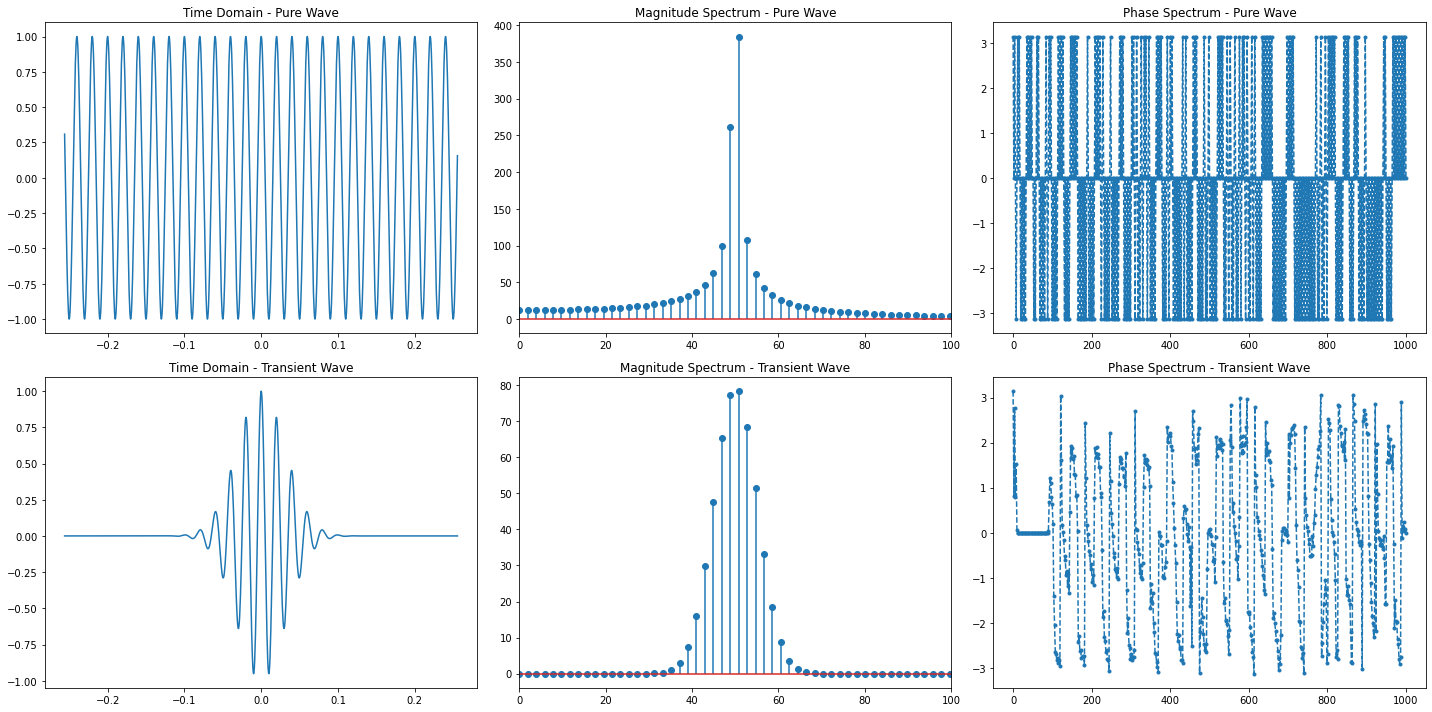

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Time domain setup
dt = 0.0005
nt = 1024
t = np.arange(nt) * dt
t -= t[nt//2]
print('Sampling frequency:', 1/dt)

# Generate a pure wave with a frequency of 50Hz
fc1 = 50
pure_wave = np.cos(2*np.pi*fc1*t)

# Generate the transient wave (Gaussian modulated wave)
fc2 = 50
agauss = .5e3
carrier = np.cos(2*np.pi*fc2*t)
gaussian = np.exp(-agauss*t**2)
transient_wave = carrier * gaussian

# FFT of the waves
PURE_WAVE = np.fft.rfft(np.fft.ifftshift(pure_wave))
TRANSIENT_WAVE = np.fft.rfft(np.fft.ifftshift(transient_wave))
f = np.fft.rfftfreq(nt, dt)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# First row: Pure wave
axs[0, 0].plot(t, pure_wave)
axs[0, 0].set_title('Time Domain - Pure Wave')
axs[0, 1].stem(f, np.abs(PURE_WAVE))
axs[0, 1].set_xlim(0, 100)
axs[0, 1].set_title('Magnitude Spectrum - Pure Wave')
axs[0, 2].plot(f, np.angle(PURE_WAVE), '--.')
axs[0, 2].set_title('Phase Spectrum - Pure Wave')

# Second row: Transient wave
axs[1, 0].plot(t, transient_wave)
axs[1, 0].set_title('Time Domain - Transient Wave')
axs[1, 1].stem(f, np.abs(TRANSIENT_WAVE))
axs[1, 1].set_xlim(0, 100)
axs[1, 1].set_title('Magnitude Spectrum - Transient Wave')
axs[1, 2].plot(f, np.angle(TRANSIENT_WAVE), '--.')
axs[1, 2].set_title('Phase Spectrum - Transient Wave')

# Show plots
plt.tight_layout()
plt.show()


Sampling frequency: 2000.0


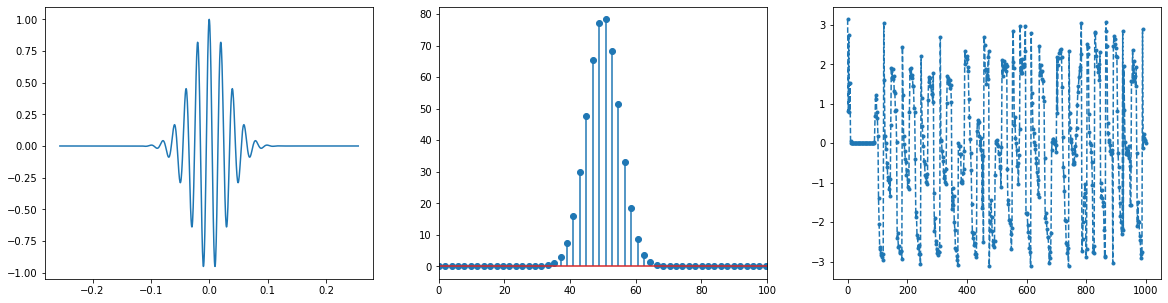

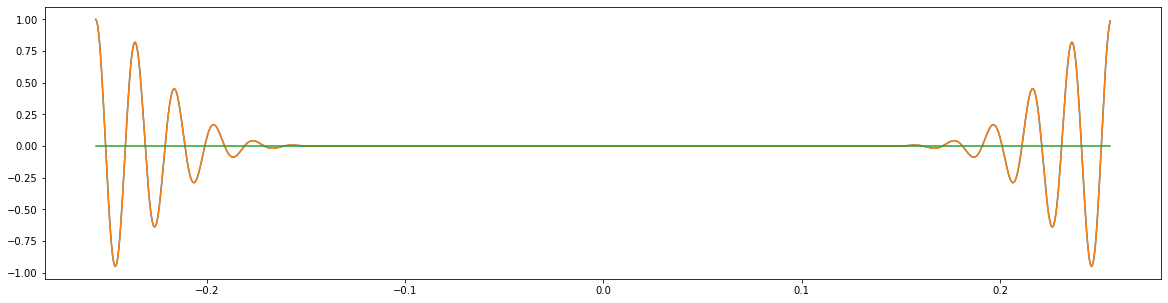

In [10]:
dt = 0.0005
nt = 1024
t = np.arange(nt) * dt
t -= t[nt//2]
print('Sampling frequency:', 1/dt)

fc = 50
agauss = .5e3
carrier = np.cos(2*np.pi*fc*t)
gaussian = np.exp(-agauss*t**2)
signal = carrier * gaussian

SIGNAL = np.fft.rfft(np.fft.ifftshift(signal))
f = np.fft.rfftfreq(nt, dt)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(t, signal)
axs[1].stem(f, np.abs(SIGNAL))
axs[1].set_xlim(0, 100)
axs[2].plot(f, np.angle(SIGNAL), '--.')

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(t, np.fft.ifftshift(signal))
ax.plot(t, np.fft.irfft(np.abs(SIGNAL)))
ax.plot(t, np.fft.ifftshift(signal)- np.fft.irfft(np.abs(SIGNAL)));

## Sum of sinouids

Reminder (must be 0 to get zero phase signal) 0.0
Sampling frequency: 2000.0 1000


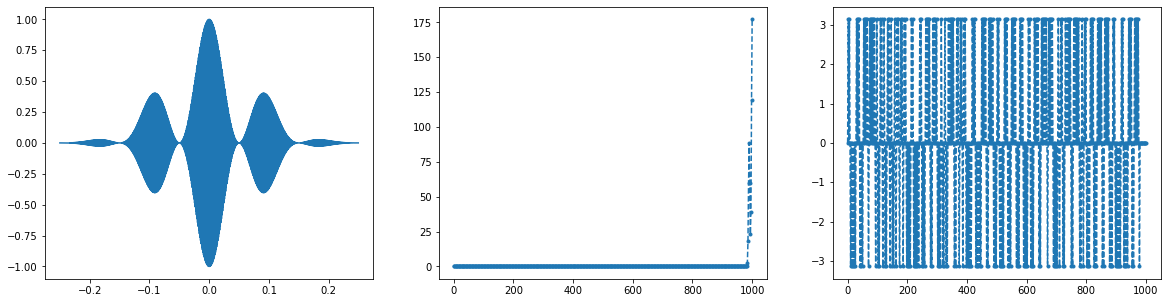

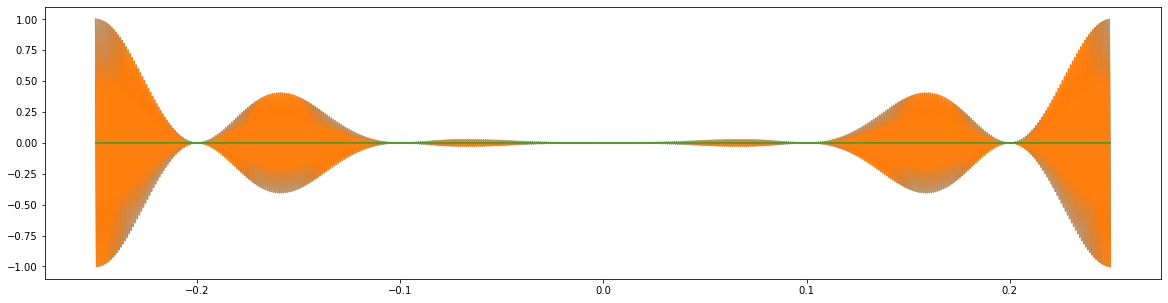

In [38]:
fc = 1000
fmod = 10
f1 = fc
f2 = fc+fmod

dt = 0.0005
nt = 5*int(1/(fmod*dt)) # multiple of number of samples per cycle of fmod modulating signal
print('Reminder (must be 0 to get zero phase signal)', 1/(fmod*dt)- int(1/(fmod*dt)))
t = np.arange(nt) * dt
t -= t[nt//2]
print('Sampling frequency:', 1/dt, nt)

agauss = 1e2
#carrier = np.cos(2*np.pi*f1*t) + np.cos(2*np.pi*f2*t)
carrier = np.cos(np.pi*(f1+f2)*t) * np.cos(np.pi*(f1-f2)*t)
gaussian = np.exp(-agauss*t**2)
signal = carrier * gaussian

SIGNAL = np.fft.rfft(np.fft.ifftshift(signal))
f = np.fft.rfftfreq(nt, dt)

fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].plot(t, signal)
axs[1].plot(f, np.abs(SIGNAL), '--.')
#axs[1].set_xlim(0, 200)
axs[2].plot(f, np.angle(SIGNAL), '--.')

fig, ax = plt.subplots(1, 1, figsize=(20, 5))
ax.plot(t, np.fft.ifftshift(signal))
ax.plot(t, np.fft.irfft(np.abs(SIGNAL)))
ax.plot(t, np.fft.ifftshift(signal)- np.fft.irfft(np.abs(SIGNAL)));